# DS3000 Foundations of Data Science
## Dialogue of Civilizations
May 20, 2024

Admin
- Homework 1 due by **midnight Tonight** (covers previous material)
- Quiz 1 is next (covers a little of previous material, but mostly this material)

Content:
- Linear Algebra Basics
  - By Hand and In Python
- Linear Regression + Assumptions
- Cross Validation

Planned Time: ~3 hour

Next thing: Quiz 1

In [1]:
# packages (I'm just going to update this as we go with the most important things we've used)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

# Linear Algebra Basics
## Intro to Vector Geometry (on board and in python)

Previously, we looked at representing data as vectors, and already talked about calculating distances between vectors such as  $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$. Data are usually represented as vectors (or matrices).

For example, the first observation in the EU population data set, Austria, represented as a vector (excluding categorical/dummy variables) was, after scaling, and rounding to three places:

$x_1 = \begin{bmatrix} 0.626 \\ 0.608 \\ -0.198 \\ -0.356 \\ -0.187 \end{bmatrix}$

Which meant that Austria had above average male and female life expectancy (the first two features), but below average birth rate, death rate, and population density.

In [2]:
# read in the data, clean it, add population density, discard categorical features, and scale again
df_EUpop = pd.read_csv('europe pop data.zip')
df_EUpop['area'] = df_EUpop['area'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop['population'] = df_EUpop['population'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop['pop_density'] = (df_EUpop.population/df_EUpop.area).round(1)
col_num_list = ['male_life_expectancy', 'female_life_expectancy', 'birth_rate', 'death_rate', 'pop_density']
df_EUpop_num = df_EUpop.loc[:, col_num_list]
# by subtracting each feature by the mean and dividing by the standard deviation, outputs will be "unit invariant"
df_EUpop_num_scaled = pd.DataFrame()
for feat in df_EUpop_num.columns:
    df_EUpop_num_scaled[f'{feat}_scaled'] = ((df_EUpop_num[feat] - df_EUpop_num[feat].mean()) / df_EUpop_num[feat].std()).round(3)

df_EUpop_num_scaled.head(3)

,male_life_expectancy_scaled,female_life_expectancy_scaled,birth_rate_scaled,death_rate_scaled,pop_density_scaled
0,0.626,0.608,-0.198,-0.356,-0.187
1,0.562,0.434,0.253,-0.120,0.827
2,0.689,1.197,1.154,-0.490,-0.126


In [3]:
austria = np.array(df_EUpop_num_scaled.iloc[0, :])
austria

array([ 0.626,  0.608, -0.198, -0.356, -0.187])

### Notation

Generally, we use **lowercase** letters to represent vectors, (for example, instead of writing out "Austria", we would call the Austria vector $\vec{x}_1$, and **uppercase** letters to represent matrices, such as when we consider the data set containing the first two countries (Austria and Belgium):

$X = \begin{bmatrix} 0.626 & 0.608 & -0.198 & -0.356 & -0.187 \\ 0.562 & 0.434 & 0.253 & -0.120 & 0.827 \end{bmatrix}$

Note that by convention also, vectors are **column vectors**, but that when we combine vectors into a data matrix, the vectors are included as the **rows**.

## Vector Addition

In order to add two vectors together, they must be the same **dimension**. For example, each country in the data set (again, discounting the categorical features) is represented by a vector of length $n = 5$ (or, each vector $\vec{x} \in \mathbb{R}^5$):

$\vec{x}_1 = \begin{bmatrix} 0.626 \\ 0.608 \\ -0.198 \\ -0.356 \\ -0.187 \end{bmatrix}$
$\vec{x}_2 = \begin{bmatrix} 0.562 \\ 0.434 \\ 0.253 \\ -0.120 \\ 0.827 \end{bmatrix}$

$\vec{x}_1 + \vec{x}_2 = \begin{bmatrix} 1.188 \\ 1.042 \\ 0.055 \\ -0.476 \\ 0.64 \end{bmatrix}$

In [4]:
# call Austria x1 and Belgium x2
x1 = np.array(df_EUpop_num_scaled.iloc[0, :])
x2 = np.array(df_EUpop_num_scaled.iloc[1, :])
x1 + x2

array([ 1.188,  1.042,  0.055, -0.476,  0.64 ])

If we simplify the vectors to be two-dimensional, we can very easily understand what the vector addition operation is doing with a quick graph (done on board). Check out what it means to add the following two vectors together:


$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x + y = \begin{bmatrix} 10 \\ 5 \end{bmatrix}$


In [5]:
x = np.array([3, 4])
y = np.array([7, 1])
x + y

array([10,  5])

## Vector "Multiplication"

You can easily multiply scalars (real numbers) to vectors:

$c\vec{x}_1 = \begin{bmatrix} 0.626(c) \\ 0.608(c) \\ -0.198(c) \\ -0.356(c) \\ -0.187(c) \end{bmatrix}$

You can see (done on board) that all this does is **scale** the vector so that it gets longer (or shorter, if the scalar is less than 1).

In [6]:
# scalar multiplication
c=3
c*x1

array([ 1.878,  1.824, -0.594, -1.068, -0.561])

But when we talk about "multiplying" vectors together, there may be more than one interpretation of that. When we think of multipying matrices elementwise, this is called the **Hadamard product**:

$\vec{x}_1 = \begin{bmatrix} 0.626 \\ 0.608 \\ -0.198 \\ -0.356 \\ -0.187 \end{bmatrix}$
$\vec{x}_2 = \begin{bmatrix} 0.562 \\ 0.434 \\ 0.253 \\ -0.120 \\ 0.827 \end{bmatrix}$

$\vec{x}_1 \circ \vec{x}_2 = \begin{bmatrix} 0.352 \\ 0.264 \\ -0.050 \\ 0.043 \\ -0.155 \end{bmatrix}$

In [7]:
# the Hadamard product
x1 * x2

array([ 0.351812,  0.263872, -0.050094,  0.04272 , -0.154649])

A more common (and useful) operation is the **dot product**. For two vectors $x$ and $y$, the dot product is:

$x\cdot y = \sum_i x_i \times y_i$

That is, the sum of all the pairwise products of the vectors (or, equivalently, the sum of the Hadamard product vector). Let's use a simple, two-dimensional example instead of our countries for a moment:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x \cdot y = 3\times7 + 4\times1 = 21 + 4 = 25$

This is a common operation that we'll use quite a bit!

In [8]:
x = np.array([3, 4])
y = np.array([7, 1])
np.dot(x, y)

25

Another useful operation we might use on occasion is finding the length of a vector:

$||x|| = \sqrt{\sum_i x_i^2}$

For example, if:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$
$||x|| = \sqrt{3^2  + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

We can also use graphing to understand this a little bit better (professor will show this on the board).

In [9]:
#in numpy
np.linalg.norm(x)

5.0

This is also called finding the $\ell 2$-**norm** of the vector. There are other **norms** which we may talk about if necessary as we proceed.

## Data as Matrices

We've already talked at length about representing data as vectors, for example:

$\vec{x}_2 = \begin{bmatrix} 0.562 \\ 0.434 \\ 0.253 \\ -0.120 \\ 0.827 \end{bmatrix}$

Is the Belgium in the EU population data set. While some machine learning algorithms can deal with observations/vectors individually (on an iterative basis), many machine learning algorithms consider the observations collectively (as a matrix). This is why general practice is to treat data as **matrices**:

$$X = \begin{bmatrix} 0.626 & 0.608 & -0.198 & -0.356 & -0.187 \\ 0.562 & 0.434 & 0.253 & -0.120 & 0.827 \\ \vdots & \vdots & \vdots & \vdots & \vdots \end{bmatrix}$$

where each row of the matrix is an observation, and each column a feature. Many of the common operations that make up machine learning algorithms require treating data as matrices. It is important also to remember that, in fact, *vectors **are** matrices*, they are simply matrices with one of the dimensionalities equal to one. For example:

$$\vec{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}$$

Is both a 3-dimensional vector and a $3 \times 1$ matrix. It's transpose (flipping the rows and columns): $\vec{a}^T = \begin{bmatrix} a_1 & a_2 & a_3 \end{bmatrix}$ is both a 3-dimensional vector and a $1 \times 3$ matrix. The below:

$$A = \begin{bmatrix} 1 & 2 & 3 \\ -4 & -5 & -6 \end{bmatrix}$$
$$B = \begin{bmatrix} -5 & 6 & 1 & -2 \\ 0 & 1 & 1 & 0 \\ 8 & 6 & 4 & -2 \end{bmatrix}$$

are both matrices, and we would say that $A$ is $2 \times 3$ and that $B$ is $3 \times 4$.

### Matrix Math and Manipulations

Assume you have two general matrices, $A$ which has shape $n \times m$ and $B$ which has shape $p \times q$. Some shapes are compatible for matrix multiplication, and many are not:

- The **inner dimensions** must match to multiply matrices
  - i.e. you may multiply a $2 \times 3$ and a $3 \times 4$ matrix. You may *not* multiply a $2 \times 3$ and $2 \times 3$ matrix.
- **Order matters**
  - based on the above, you should note that if $A$ is $2 \times 3$ and $B$ is $3 \times 4$, you may find $AB$ but **NOT** $BA$.
 
**Also**: matrix multiplication is **NOT** pairwise multiplication (that's the Hadamard product!). This should be obvious from the restrictions above. If you cannot multiply $2\times3$ and $2\times3$, then multiplication can't be that simple. So how do we do it?

In [10]:
A = np.array([[1, 2, 3],
             [-4, -5, -6]])
B = np.array([[-5, 6, 1, -2],
             [0, 1, 1, 0],
             [8, 6, 4, -2]])

In [11]:
# note the error when we try to multiply pairwise elements (* operator)
# you can't take the Hadamard product of matrices of different dimension
# A*B

In [12]:
# the numpy function that does matrix multiplication
np.matmul(A, B)

array([[ 19,  26,  15,  -8],
       [-28, -65, -33,  20]])

### What happened? How does matrix multiplication work?

Notice that the resulting matrix from multiplying $A$ by $B$ **kept the outer dimensions of the two matrices**. I.e. multiplying a $2\times3$ matrix by a $3\times4$ matrix resulted in a single $2\times4$ matrix. This is because matrix multiplication is a result of:

- Each element in the product matrix is the **dot product** of the corresponding **row from the left matrix** and **column from the right matrix**

In [13]:
# first row, first column
np.dot(A[0,:], B[:,0])

19

In [14]:
# first row, second column
np.dot(A[0,:], B[:,1])

26

In [15]:
# second row, first column
np.dot(A[1,:], B[:,0])

-28

### So, if vectors are matrices...

As long as the inner dimensions match, we can multiply matrices. This means we can multiply vectors by matrices and matrices by vectors. In fact:

- Matrix-vector multiplcation ($A\vec{x}$, for matrix $A$ and vector $\vec{x}$) is a linear combination of the **rows** of $A$
- Vector-Matrix multiplcation ($\vec{x}A$, for vector $\vec{x}$ and matrix $A$) is a linear combination of the **columns** of $A$

**Example:**

$$A = \begin{bmatrix} 1 & 2 & 3 \\ -4 & -5 & -6 \end{bmatrix}$$
$$\vec{x} = \begin{bmatrix} 2 \\ 4 \\ -2 \end{bmatrix}$$
$$A\vec{x} = \begin{bmatrix} 1 & 2 & 3 \\ -4 & -5 & -6 \end{bmatrix}  \begin{bmatrix} 2 \\ 4 \\ -2 \end{bmatrix} = \begin{bmatrix} 1(2) + 2(4) + 3(-2) \\ (-4)(2) + (-5)(4) + (-6)(-2) \end{bmatrix} = \begin{bmatrix} 4 \\ -16 \end{bmatrix}$$

In [16]:
x = np.array([2, 4, -2])
np.matmul(A, x)

array([  4, -16])

In [17]:
# remember that order matters; we cannot do xA because x is 3x1 and A is 2x3:
#np.matmul(x, A)

## Lecture Break/Practice

Take 5 minutes to solve the below by hand/in numpy. If we call the following matrices/vectors:

$A = \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}$
$B = \begin{bmatrix} -5 & -6 \\ 0 & 1 \end{bmatrix}$
$\vec{x} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$
$\vec{y} = \begin{bmatrix} -2 \\ -3 \\ -4 \end{bmatrix}$

- $A\vec{y}$
- $B\vec{x}$

Think for a moment about the structure of our EU population data:

In [18]:
df_EUpop_num_scaled.shape

(36, 5)

This is the **dimension** of the matrix that represents all our data; 36 countries with 5 features measured about each one. Since we're going to be treating it as a matrix, it would make sense to cast it to an **array** in Python using NumPy. Note that you can't do this if any of the columns of your data are strings/categorical, because arrays, just like matrices, can only have numbers in them:

In [19]:
Xdat = np.array(df_EUpop_num_scaled)
Xdat

array([[ 0.626,  0.608, -0.198, -0.356, -0.187],
       [ 0.562,  0.434,  0.253, -0.12 ,  0.827],
       [ 0.689,  1.197,  1.154, -0.49 , -0.126],
       [ 0.562,  0.538, -0.288,  0.183,  0.284],
       [ 0.88 ,  0.608, -0.468, -1.063,  0.3  ],
       [ 0.732,  0.816,  0.523, -1.366,  0.325],
       [ 0.816,  0.434,  0.073, -0.558,  0.984],
       [ 1.092,  1.162,  0.253, -0.861,  0.197],
       [-1.407, -0.848, -0.288,  0.554, -0.415],
       [-1.28 , -1.507, -1.009,  2.238, -0.351],
       [-0.136, -0.19 ,  0.613,  0.251, -0.078],
       [-0.772, -0.952, -0.018,  1.059, -0.193],
       [-1.746, -1.923,  0.163,  0.15 , -0.295],
       [-0.708, -0.363, -0.198,  0.419, -0.131],
       [-1.153, -1.195, -0.378,  1.362, -0.282],
       [-2.   , -1.889,  0.163,  1.093, -0.552],
       [-0.518, -0.502,  0.703, -0.187, -0.168],
       [-2.021, -1.958, -1.639,  1.531, -0.311],
       [ 0.774,  0.608,  0.703, -0.659, -0.077],
       [-0.369,  0.296,  0.253,  0.183, -0.474],
       [ 0.732,  1.0

### Matrix-vector Multiplication as a Transformation

Let us focus only on the situation where we have a matrix multiplied by a column vector, as above, but let's simplify (for now) to the situation where the matrix $A$ is a **square** matrix (i.e. same number of rows and columns). This means that the vector $\vec{x}$ must have the same number of rows as $A$, and the resulting product $A\vec{x}$ will be of the same dimension as $\vec{x}$:

**Example:**

$$A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$$
$$\vec{x} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$
$$A\vec{x} = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} 2 \\ 4 \end{bmatrix} = \begin{bmatrix} 2(2) + 0(4) \\ 0(2) + 3(4) \end{bmatrix} = \begin{bmatrix} 4 \\ 12 \end{bmatrix}$$

In [20]:
A = np.array([[2,0],
              [0,3]])
x = np.array([2, 4])
np.matmul(A, x)

array([ 4, 12])

What happens if we think about this in terms of **how $A$ *changes* $\vec{x}$**? Before applying the matrix $A$ to $\vec{x}$, it was $\vec{x} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$, and afterwards it was $A\vec{x} = \begin{bmatrix} 4 \\ 12 \end{bmatrix}$, which we note is a vector of the same dimension. You can think of this graphically as $A$ **transforming** $\vec{x}$.

(Draw a picture on the board)

Now what happens if we apply a different matrix, $B$? Perhaps something like:

$$B = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$
$$\vec{x} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$
$$B\vec{x} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 2 \\ 4 \end{bmatrix} = \begin{bmatrix} 0(2) + (-1)(4) \\ 1(2) + 0(4) \end{bmatrix} = \begin{bmatrix} -4 \\ 2 \end{bmatrix}$$

In [21]:
B = np.array([[0,-1],
              [1,0]])
np.matmul(B, x)

array([-4,  2])

(Draw a picture on the board)

The values in the **diagonal** elements of $A$ seem to **scale** the vector $\vec{x}$ when applied, and the values in the **off-diagonal** elements of $B$ seem to **rotate** the vector $\vec{x}$ when applied. So, if we combine them, what happens?

$$A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$$
$$B = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$
$$\vec{x} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$
$$AB\vec{x} = ??$$

- Remember that order matters, so the above $AB\vec{x}$ will **first rotate, then scale**, while $BA\vec{x}$ will **first scale, then rotate**. Note that this *does* make a difference in this case:

In [22]:
np.matmul(A, np.matmul(B, x))

array([-8,  6])

In [23]:
np.matmul(B, np.matmul(A, x))

array([-12,   4])

(Draw pictures on the board to illustrate)

Finally note that if you tried to combine the two actions into one matrix, $C$, the matrix operations are not "additive":

In [24]:
C = np.array([[2, -1],
              [1, 3]])
np.matmul(C, x)

array([ 0, 14])

### Vector Spaces and Spans

What is a vector space?

- The coordinate planes defined by the dimensions make up the vector space; i.e. the number line makes up the 1-dimensional "vector" space, the $x-y$ axes make up the 2-dimensional vector space (a plane), while the $x-y-z$ axes make up the 3-dimensional vector space, etc.

The **basis vectors** of a vector space are the vectors that "define" the direction of the axes, for example:

- the $x-y$ plane has basis vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$
  - any other vector in 2-dimensional space can be reached by a linear combination of the two basis vectors.
 
**Example:**

$$\begin{bmatrix} 3 \\ 4 \end{bmatrix} = 3\hat{i} + 4\hat{j}$$
$$\begin{bmatrix} -23 \\ 42 \end{bmatrix} = -23\hat{i} + 42\hat{j}$$

In [25]:
ihat = np.array([1,0])
jhat = np.array([0,1])
3*ihat + 4*jhat

array([3, 4])

In [26]:
-23*ihat + 42*jhat

array([-23,  42])

You can use *other* vectors as "basis" vectors. For example, you can determine which coordinates can be reached by a linear combination of the following two vectors:

$$\vec{v} = \begin{bmatrix} 2 \\ 0 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

This is called finding the **span** of a set of vectors. The **span of the basis vectors $\hat{i}$ and $\hat{j}$ is the entire $x-y$ plane**. How do you determine the span of a set of vectors? Use placeholders:

$$\alpha \vec{v} + \beta \vec{w} = \alpha \begin{bmatrix} 2 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 2\alpha + \beta \\ 2\beta \end{bmatrix}$$

This is a 2-dimensional vector where (using $x$ for the $x$-axis and $y$ for the $y$-axis), $x = 2\alpha + \beta$ or $y = 2\beta$. These functions help us **define the span**; note that there are no restrictions on what $x$ and $y$ can be (given any choices of $\alpha$ and $\beta$), meaning that these two vectors' span is also the entire $x-y$ plane:

$$y = 2(x - 2\alpha) \rightarrow y = 2x - 4\alpha$$

**Example (when the span is *not* the entire plane):**

$$\vec{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$
$$\alpha \vec{v} + \beta \vec{w} = \alpha \begin{bmatrix} -1 \\ -2 \end{bmatrix} + \beta \begin{bmatrix} 2 \\ 4 \end{bmatrix} = \begin{bmatrix} -\alpha + 2\beta \\ -2\alpha + 4\beta \end{bmatrix}$$

Which means $x = -\alpha + 2\beta$ and $y = -2\alpha + 4\beta$, which in the 2-dimensional vector space is simply the **line $y=2x$**:

$$y = -2\alpha + 4\beta = 2(-\alpha + 2\beta) = 2x$$

**Fact/Note:** if a 2-d vector is a multiple of the other, you are guaranteed to have a line as the span of the two vectors (above, for example, $\vec{w} = -2\vec{v}$).

#### Spans In Summary

In two-dimensions, there are three cases for the span of any set of 2-dimensional vectors:

- Every point in the plane (see above)
- A line passing through the origin (see above)
- The origin (special case: the span of a set of origin vectors)

In N-dimensions, there are *still* three cases for the span of any set of $N$-dimensional vectors:

- Every point in the $N$-dimensional space
- A reduced dimensionality space, passing through the origin (e.g. a plane or a line in 3-dimensions)
- The origin

**Finally**: the span of $N$ vectors is never more than $N$-dimensional space.

- Example: The span of any single vector (of any dimension) is either a line or the origin (if it is the origin):

$$\vec{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$$

Even though $\vec{v}$ exists in 3-dimensional space, the span of this single vector are any points reached by: $\alpha \vec{v} = \begin{bmatrix} \alpha \\ 2\alpha \\ 3\alpha \end{bmatrix}$, which is the line $z = x + y$ in 3-dimensional space.

### Linear Dependence and Independence

A set of vectors is **linearly dependent** if one of the vectors is a linear combination of the others:

- i.e. if the span is a line (see above, and below)

A set of vectors is **linearly independent** if each vector adds a new dimension to the span

- see below for general idea

**Linearly Dependent Vectors**:

The set of vectors: $\vec{a} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$, and $\vec{c} = \begin{bmatrix} 2 \\ 3 \\ 0 \end{bmatrix}$ is linearly dependent because $\vec{c} = 2\vec{a} + 3\vec{b}$.

**Linearly Independent Vectors**:

The set of vectors: $\vec{a} = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix} \beta \\ \text{Anything Non-Zero} \end{bmatrix}$ for any $\alpha$ and $\beta$ is linearly independent.

**Fact/Note:** $N+1$ or more vectors of length $N$ are linearly dependent. Example:

The set of vectors: $\vec{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -4 \\ 6 \end{bmatrix}$, and $\vec{c} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ is linearly dependent because $\vec{b} = -2\vec{a} + 8\vec{c}$.

- This is actually a very important point for machine learning with data. When you have more **features** than **observations** (this is called the [Large p, small n problem](https://www.google.com/search?q=Large+p%2C+small+n+problem&sca_esv=576533920&sxsrf=AM9HkKl_8u1hxRNyO9OTf4YbeWyD68GxSw%3A1698255238798&ei=hlE5ZduOMIKU5OMPj5mxOA&ved=0ahUKEwjb6fvh3ZGCAxUCCnkGHY9MDAcQ4dUDCBA&uact=5&oq=Large+p%2C+small+n+problem&gs_lp=Egxnd3Mtd2l6LXNlcnAiGExhcmdlIHAsIHNtYWxsIG4gcHJvYmxlbTIFEAAYgAQyCBAAGIoFGIYDMggQABiKBRiGAzIIEAAYigUYhgNIqSdQ0AZYuiZwBHgBkAEBmAHsAaABpRWqAQYxNy42LjK4AQPIAQD4AQHCAgoQABhHGNYEGLADwgIEECMYJ8ICBxAuGIoFGCfCAggQABiKBRiRAsICCxAuGIoFGLEDGIMBwgIREC4YgAQYsQMYgwEYxwEY0QPCAgcQIxiKBRgnwgILEC4YgwEYsQMYgATCAgsQABiKBRixAxiDAcICCxAAGIAEGLEDGIMBwgIOEC4YgAQYxwEYrwEYjgXCAggQLhiABBixA8ICDhAuGIAEGLEDGMcBGNEDwgIIEAAYgAQYsQPCAgoQABiABBgUGIcCwgIGEAAYFhge4gMEGAAgQYgGAZAGCA&sclient=gws-wiz-serp)) it means that you are almost certainly going to overfit your data (and, that the features are linearly dependent). We can see a practical example of this when we learn line of best fit shortly.

### Orthogonality

Vectors are **orthogonal** if their dot product is zero (equivalently, if the angle between them is 90 degrees).

**Examples:**

In [27]:
# the basis vectors are orthogonal
np.dot(ihat, jhat)

0

In [28]:
northwest = np.array([-1,1])
northeast = np.array([1, 1])
np.dot(northwest, northeast)

0

### Projections

A **projection** is a matrix transformation that we can apply to a vector as many times as we'd like and always get the same result. I.e. for the same $b$:

- $A\vec{x} = b$
- $AA\vec{x} = b$
- $AAA\vec{x} = b$
- $\cdots$

**Counterexample and Example**:

The matrix $A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$ (from before) is **NOT** a projection matrix:

In [29]:
print(f'A = {A}')
print(f'x = {x}')
print(f'Ax = {np.matmul(A, x)}')
print(f'AAx = {np.matmul(A, np.matmul(A, x))}')
print(f'AAAx = {np.matmul(A, np.matmul(A, np.matmul(A, x)))}')

A = [[2 0]
 [0 3]]
x = [2 4]
Ax = [ 4 12]
AAx = [ 8 36]
AAAx = [ 16 108]


In [30]:
A = np.array([[1, 0],
              [0, 0]])
print(f'A = {A}')
print(f'x = {x}')
print(f'Ax = {np.matmul(A, x)}')
print(f'AAx = {np.matmul(A, np.matmul(A, x))}')
print(f'AAAx = {np.matmul(A, np.matmul(A, np.matmul(A, x)))}')

A = [[1 0]
 [0 0]]
x = [2 4]
Ax = [2 0]
AAx = [2 0]
AAAx = [2 0]


Projection matrices are used to **project** vectors from higher-dimensional space into lower-dimensional space. In the above, the result $\begin{bmatrix} 2 \\ 0 \end{bmatrix}$ is the **projection of $\vec{x}$ onto the span of $A$**. Let's back up and look at this slowly:

Say you have a vector space defined by the following vectors:

$$\vec{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}$$
$$\vec{w} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$$

We previously showed that the span of these vectors is a line, $y = 2x$. Since we know the vectors are multiples of each other, we can actually see that we only need one vector to properly define the span.

Let's choose to rename $\vec{w}$ to be $\vec{a} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}$. Suppose there is another 2-dimensional vector which we wish to **project onto the span of $\vec{a}$?** In other words, find the point in the span of $\vec{a}$ that is closest to this new vector, say $\vec{b} = \begin{bmatrix} -2 \\ 3 \end{bmatrix}$.

(Visualize this on the board)

Let's call:

- $\vec{p}$: the projection of $\vec{b}$ onto the span of $\vec{a}$, it is a scaled version of $\vec{a}$
- $\vec{e}$: the vector orthogonal to $\vec{a}$ (at 90 degrees) which "points" to $\vec{b}$

From this we can write down some facts using vector algebra/definitions:

- $\vec{p} = c \times \vec{a}$, where $c$ is some scalar
- $\vec{b} = \vec{p} + \vec{e}$, and thus $\vec{e} = \vec{b} - \vec{p}$
- $\vec{a} \cdot \vec{e} = 0$, since $\vec{a}$ and $\vec{e}$ are orthogonal
  - The dot product is also the multiplication of the transpose of $\vec{a}$ and $\vec{e}$: $\vec{a}^T\vec{e}$ (you can confirm this by hand)

**Note**: I'm going to shift notation from hereon, because it's taking me too long to make these lectures! Just a small change: I'm going to omit the arrow on top of vectors, they will just be lowercase letters from now on (i.e. $\vec{a} = a$, for simplicity of my typing and also because it doesn't really matter as long as it's clear when something is a vector. If you're ever confused about notation, just ask!

From these three facts, we can rearrange things:

- $e = b - c \times a$
- $a^T(b - c\times a) = 0$
- $a^Tb - a^Tca = 0$
- $c = \frac{a^Tb}{a^Ta} = \frac{a \cdot b}{a \cdot a}$

Which is, in fact, all we need to find the projection:

In [31]:
a = np.array([2, 4])
b = np.array([-2, 3])
c = np.dot(a, b)/np.dot(a, a)
p = c*a
print(c)
p

0.4


array([0.8, 1.6])

#### In higher dimensions

Now suppose we want to project $b = \begin{bmatrix} 3 \\ 1 \\ 5 \end{bmatrix}$ onto the span of $a_0 = \begin{bmatrix} 0 \\ 3 \\ 0 \end{bmatrix}$ and $a_1 = \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix}$. We can show that the span is the $x-y$ plane:

$$\alpha \begin{bmatrix} 0 \\ 3 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2\beta \\ 3\alpha + \beta \\ 0 \end{bmatrix}$$

Which implies $z = 0$ (or, no third dimensional values in the span), $y = 3\alpha + \frac{x}{2}$ which can be anything for a given $\alpha$.

It should be obvious, because $b$ has a $z$-coordinate of 5, that $b$ is **NOT** in the span of $a_0$ and $a_1$ (it is not on the $x-y$ plane). Let's project it down to that lower-dimensional space.

(Can try to draw a picture)

Note some similarities to the two dimensional case:

- $p = c_0 a_0 + c_1 a_1 = Ac$
  - **Note**: here, the two scalars that scale the $a$ vectors are treated as two values in a vector $c$, and the two $a$ vectors are now the columns in a $3\times2$ matrix, $A$.
- $b = p + e$, and thus $e = b - p$
- $a_0 \cdot e = a_1 \cdot e = 0$
  - Or, equivalently, $A^Te = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

Using the same framework as in 2-dimensions, we can again rearrange things:

- $e = b - Ac$
- $A^T(b - Ac) = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
- $A^Tb = A^TAc$

**But wait!** the goal is to solve for the $c$ vector. In 2-dimensions there was no problem because $a^Tb$ and $a^Ta$ were both scalars; you could divide them. But now, they are matrices, and you **can't divide matrices**. In order to figure out how to solve this, we need:

### Matrix Inverses (for square matrices)

We would like something to "cancel out" whatever is in front of $c$, so we can get it by itself. I.e. we want $?$ so that:

$$?(A^TA)c = c$$

Simplify the problem (the below is the same thing, just with different notation):

$$?x = x$$

- In general, we'd like to find some matrix $?$ that when you multiply it by $x$ results in only $x$. **Example:** if we want

$$\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix} \begin{bmatrix} 3 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$$

What must $\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}$ be?

$$\begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = I$$

This is called the **identity matrix**. I think we've actually already seen this in numpy (a long time ago...):

In [32]:
# gives you the 2-dimensional identity matrix
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [33]:
x = np.array([3,1])
np.matmul(I, x)

array([3., 1.])

So, we want $?A^TA = I$...

The **inverse** of a square matrix is the matrix that we multiply it by to result in the identity matrix. In other words, for a square matrix $A$:

$A^{-1}A = I$

And, thus, for the square matrix $A^TA$:

$(A^TA)^{-1}A^TA = I$

We can find this easily with numpy:

In [34]:
A = np.array([[1, 2],
              [3, 4]])
Ainv = np.linalg.inv(A)
Ainv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [35]:
np.matmul(Ainv, A).round()
# note I'm rounding above because python does some weird rounding of it's own under the hood...
# np.matmul(Ainv, A)

array([[1., 0.],
       [0., 1.]])

**Finally**, this means that we can solve for the projection of the point $b = \begin{bmatrix} 3 \\ 1 \\ 5 \end{bmatrix}$ from three-dimensional space down to the span defined by $A = \begin{bmatrix} 0 & 2 \\ 3 & 1 \\ 0 & 0 \end{bmatrix}$, which is the $x-y$ plane:

- $A^Tb = A^TAc$
- $(A^TA)^{-1}A^Tb = c$
- $p = Ac = A(A^TA)^{-1}A^Tb$

In [36]:
A = np.array([[0, 2],
              [3, 1],
              [0, 0]])
b = np.array([3, 1, 5])
AtAinv = np.linalg.inv(np.matmul(A.T, A))
c = np.matmul(AtAinv, np.matmul(A.T, b))
p = np.matmul(A, c)
p

array([3., 1., 0.])

Which, you'll note, is directly "under" $b$ on the $x-y$ plane (if you draw a quick picture).

## Lecture Break/Practice

Find the projection of the point $b = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$ to the span defined by $A = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$.

# FINALLY: Welcome to Machine Learning
## Line of Best Fit -> Linear Regression

Believe it or not, if you correctly did that practice problem above, you've already found the line of best fit through a collection of points. How?

- Imagine we have a set of points in any dimensional space (we'll start with 2-d for now) and we would like to find a line that "averages" all the points (or, that best fits them):
  - (Draw a picture on the board)
  - We would like a line that does not necessarily have to go through the origin
  - If points are not already "on" a line, it means that the points (vectors) **don't all share the same span**.
 
**Example**

Imagine we have three two-dimensional vectors which represent the points we want to find the line that fits them best:

$$\begin{bmatrix} 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 3 \\ 4 \end{bmatrix}$$

These points correspond to $x-y$ values, which (in a real data sense) correspond to an $x$-feature and a $y$-feature, which we usually throw into their own vectors:

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, y = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$$

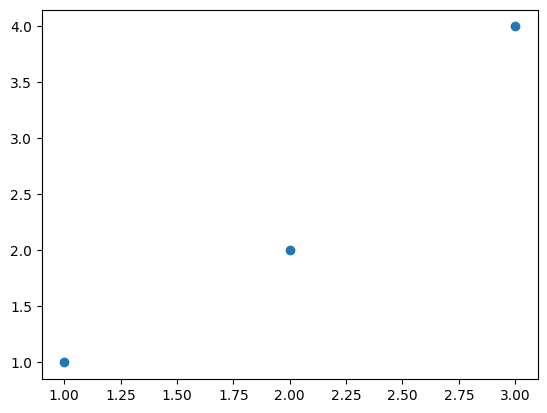

In [37]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 4])
plt.scatter(x, y);

Since the three vectors are not in the same span, this means that there's no single value (call it $m$) that makes $y = mx$. In other words, you can't represent $y$ as a linear combination of $x$. **BUT**, we can find the projection of $x$ onto $y$:

$$p = mx$$

Using the same process as before:

$$p = \frac{x^Ty}{x^Tx}x \rightarrow m = \frac{x^Ty}{x^Tx} = \frac{17}{14}$$

In other words, we found *a* line of best fit for these points, using projections: $y = \frac{17}{14}x$.

What's undesirable about this line, and might mean it's not *the* line of best fit though? **No intercept!**. How to solve this? We add what we call a "bias" (or, "intercept") term to $x$ to turn it into a matrix:

$$X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$$

If everything else remains the same, what happens?

$$p = Xm$$

Where $m$ is now a $2\times 1$ vector instead of a single constant:

$$p = X\left[(X^TX)^{-1}X^Ty\right] \rightarrow m = (X^TX)^{-1}X^Ty = \cdots \text{ see below } \cdots = \begin{bmatrix} \frac{-2}{3} \\ 1.5 \end{bmatrix}$$

In [38]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([-0.66666667,  1.5       ])

What does this vector represent? It represents the (respectively) **intercept** and **slope** of the line of best fit through the points:

$$y = \frac{-2}{3} + 1.5x$$

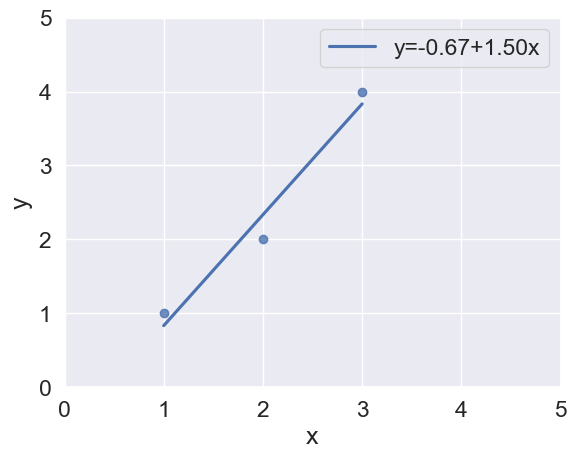

In [39]:
# seaborn's regplot will add the line for us, as long as the data are in a data frame
sns.set(font_scale=1.5)
silly_df = pd.DataFrame({'x': x,
                         'y': y})
plot = sns.regplot(data=silly_df, x='x', y='y', fit_reg=True, ci=None, line_kws={'label':"y={1:.2f}+{0:.2f}x".format(1.5,-.667)});
plot.set(xlim=(0,5), ylim=(0, 5));
plot.legend();

## With Real Data

So, let's take a look at how this can work so quickly with a couple real data sets.

Here are a couple data sets you've seen: the Europe Population Data set and the Energy Data set from the Quiz:

# read in the data, clean it, add population density, discard categorical features, and scale again
df_EUpop = pd.read_csv('europe pop data.zip')
df_EUpop['area'] = df_EUpop['area'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop['population'] = df_EUpop['population'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop['pop_density'] = (df_EUpop.population/df_EUpop.area).round(1)
col_num_list = ['male_life_expectancy', 'female_life_expectancy', 'birth_rate', 'death_rate', 'pop_density']
df_EUpop_num = df_EUpop.loc[:, col_num_list]
# by subtracting each feature by the mean and dividing by the standard deviation, outputs will be "unit invariant"
df_EUpop_num_scaled = pd.DataFrame()
for feat in df_EUpop_num.columns:
    df_EUpop_num_scaled[f'{feat}_scaled'] = ((df_EUpop_num[feat] - df_EUpop_num[feat].mean()) / df_EUpop_num[feat].std()).round(3)

df_EUpop_num_scaled.head(3)

In [40]:
# same thing
worldbank_df = pd.read_csv("GDP_Energy_WBdat.csv")
worldbank_df['CO2_Upop'] = worldbank_df.CO2_emit/worldbank_df.Urban_pop
num_cols = ['GDP', 'Fossil_Fuels', 'CO2_emit', 'Urban_pop', 'CO2_Upop']
worldbank_df2 = pd.DataFrame()
for feat in num_cols:
    worldbank_df2[f'{feat}_scaled'] = ((worldbank_df[feat] - worldbank_df[feat].mean()) / worldbank_df[feat].std()).round(3)

worldbank_df2.head(3)

,GDP_scaled,Fossil_Fuels_scaled,CO2_emit_scaled,Urban_pop_scaled,CO2_Upop_scaled
0,-0.108,0.154,-0.391,-0.454,0.112
1,-0.070,0.154,-0.368,-0.452,0.279
2,0.060,0.049,-0.394,-0.450,0.054


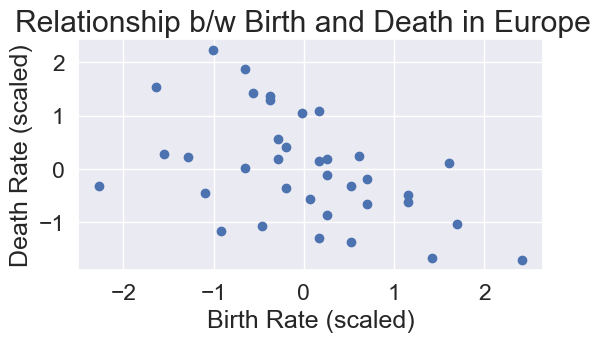

In [41]:
plt.scatter(df_EUpop_num_scaled['birth_rate_scaled'], df_EUpop_num_scaled['death_rate_scaled'])
plt.xlabel('Birth Rate (scaled)')
plt.ylabel('Death Rate (scaled)')
plt.suptitle('Relationship b/w Birth and Death in Europe')
plt.gcf().set_size_inches(6, 3)

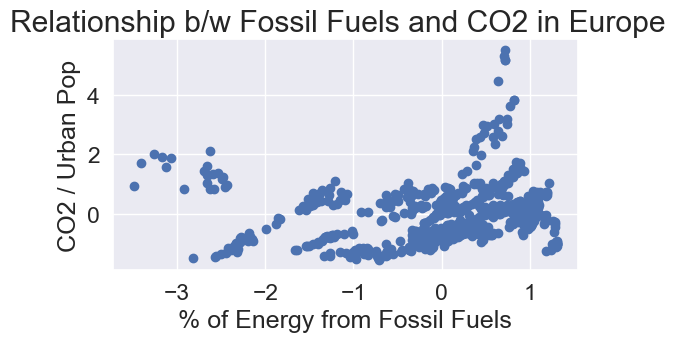

In [42]:
plt.scatter(worldbank_df2['Fossil_Fuels_scaled'], worldbank_df2['CO2_Upop_scaled'])
plt.xlabel('% of Energy from Fossil Fuels')
plt.ylabel('CO2 / Urban Pop')
plt.suptitle('Relationship b/w Fossil Fuels and CO2 in Europe')
plt.gcf().set_size_inches(6, 3)

It looks like a line may be a reasonable thing to fit to the first data, but maybe not the second (we'll talk more about how to check if it's *not* a reasonable thing shortly), so let's do it!

In [43]:
# notice that to include my bias column conveniently, I first create the transpose of X
X = np.array([[1] * len(df_EUpop_num_scaled),
              df_EUpop_num_scaled.birth_rate_scaled]).T
y = np.array(df_EUpop_num_scaled.death_rate_scaled)
X[0:5,]

array([[ 1.   , -0.198],
       [ 1.   ,  0.253],
       [ 1.   ,  1.154],
       [ 1.   , -0.288],
       [ 1.   , -0.468]])

In [44]:
m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
np.set_printoptions(suppress=True) #this just prevents python from printing it out in inconvenient scientific notation
m

array([-0.00005556, -0.48176053])

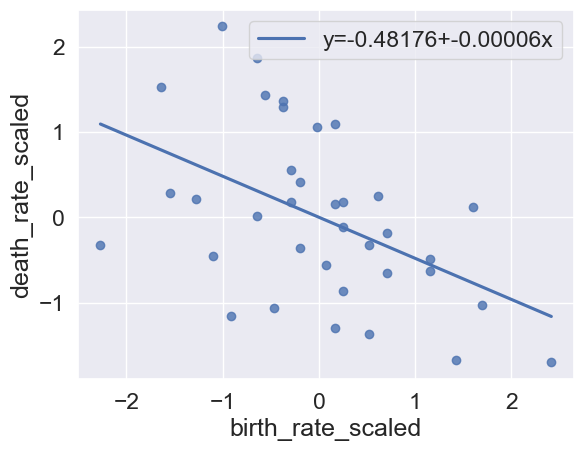

In [45]:
plot = sns.regplot(data=df_EUpop_num_scaled, x='birth_rate_scaled', y='death_rate_scaled', fit_reg=True, ci=None, 
                   line_kws={'label':"y={1:.5f}+{0:.5f}x".format(-0.00006,-0.48176)});
plot.legend();

## What is Linear Regression exactly?
### Motivation

We want to predict $y$ given that we know $x$, or at least understand the relationship between $x$ and $y$. Or, as an example, researchers want to know if Europeans trusting in others has an impact on their life satisfaction; i.e. if they can help EU citizens trust other people, will that help improve their satisfaction? They collect some data and make a plot:

In [46]:
df_EUlife = pd.read_csv("EU_life_sat.csv")
df_EUlife.head()

,Country,LifeSat,TrustInOthers,Sex,AgeClass,EducationClass
0,Belgium,7.8,6.0,Male,Youth,Primary
1,Bulgaria,7.0,5.1,Male,Youth,Primary
2,Czechia,8.3,5.5,Male,Youth,Primary
3,Denmark,7.7,5.0,Male,Youth,Primary
4,Germany,7.7,5.4,Male,Youth,Primary


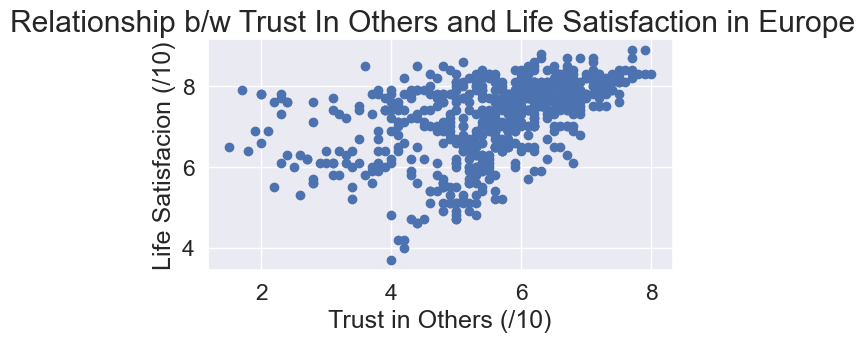

In [47]:
plt.scatter(df_EUlife['TrustInOthers'], df_EUlife['LifeSat'])
plt.xlabel('Trust in Others (/10)')
plt.ylabel('Life Satisfacion (/10)')
plt.suptitle('Relationship b/w Trust In Others and Life Satisfaction in Europe')
plt.gcf().set_size_inches(6, 3)

It definitely **seems** like the more someone trusts, the more satisfied in life they end to be, but can we **model** this relationship, to be able to truly characterize it?

# What is the model?
## Simple linear regression (Ordinary Least Squares)

Simple linear regression seeks to find coefficients $b_0, b_1$ so that the function:

$$ \hat{y} = b_0 + b_1 x $$

is able to predict $y$ from $x$.

* $x$ is our input data 
    - (Trust in Others)
* $y$ is the outcome we're predicting 
    - (Life Satisfaction)

To learn the function we 
1. observe paired observations of $(x, y)$ 
1. find and interpret the $b_i$ coefficients which best map $x$ to $y$

**Translate this from our linear algebra:**

- $x$, our input data, is the **second column** of our design matrix: e.g. $X = \begin{bmatrix} 1 & 6 \\ 1 & 5.1 \\ \vdots & \vdots \end{bmatrix}$
- $y$, our outcome, is **unchanged**; the $y$ vector: e.g. $y = \begin{bmatrix} 7.8 \\ 7 \\ \vdots \end{bmatrix}$
- The resulting **coefficient vector** from the line of best fit contains our intercept and slope: $(X^TX)^{-1}X^Ty = b = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$
- The predicted outcome, $\hat{y}$ is the **projection** of $y$ to the span of $X$: $\hat{y} = Xb$

In [48]:
# notice that to include my bias column conveniently, I first create the transpose of X
# vector x
x = df_EUlife.TrustInOthers
# design matrix X
X = np.array([[1] * len(df_EUlife),
              x]).T
y = np.array(df_EUlife.LifeSat)
X[0:5,]

array([[1. , 6. ],
       [1. , 5.1],
       [1. , 5.5],
       [1. , 5. ],
       [1. , 5.4]])

In [49]:
b = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
np.set_printoptions(suppress=True) #this just prevents python from printing it out in inconvenient scientific notation
b

array([5.19530959, 0.36405117])

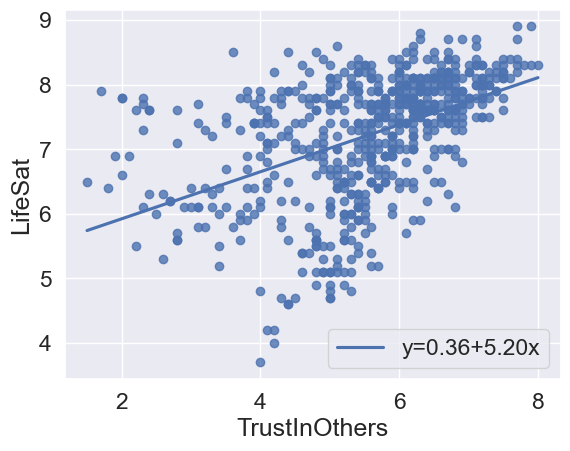

In [50]:
plot = sns.regplot(data=df_EUlife, x='TrustInOthers', y='LifeSat', fit_reg=True, ci=None, 
                   line_kws={'label':"y={1:.2f}+{0:.2f}x".format(b[0],b[1])});
plot.legend();

## How does this help us "learn"? What do $b_1$ (slope) and $b_0$ (intercept) mean?

### Algebraic meaning:
- $b_1$ is the slope of the line
    - when x increases by 1, how much does y change?
- $b_0$ is the y-intercept of the line
    - when x=0, what value is y?
   
### Application meaning:
Returning to our example where:
- $x$ is the trust in others
- $y$ is the life satisfaction


- because $b_1$ is the increase in y when x increases by 1
    - it represents the predicted increase in life satisfaction when a country's trust in others increases by 1
- because $b_0$ is the value of y when x=0
    - it represents the predicted life satisfaction when a country's trust in others is 0
        - **Note:** in practical terms, occasionally the intercept is meaningless!

## Bigger Ideas/Different Notation (for the same model)

The way we specified the simple linear regression model above is essentially in terms only of the line of best fit. However, we should worry about whether it is appropriate at all to fit a (straight) line to the data; the model makes **assumptions** about the general behavior of the data. To provide more context for that idea, let's talk about another way of specifying the model:

$$y = X\beta + \varepsilon$$

Where $y$ and $X$ are defined as before, and we call $\beta$ the vector of **true** coefficients (i.e. that represent the true intercept, $\beta_0$ and true slope, $\beta_1$), and $\varepsilon$ is the **error** term. The previous specification is equivalent to:

$$\hat{y} = X\hat{\beta}$$

So that, $\hat{\beta} = (X^TX)^{-1}X^Ty$. However, the real benefit of specifying the model as above is twofold:

1. It re-sets our mind into thinking about the fact that the **estimated model** is based on data, and is only an estimate of the **true model**, which we can never truly know. This means that we could have multiple estimated models for the same relationship, either based on different specifications of the model (i.e. adding more $x$ features).
2. It provides some idea of, since there are **errors** even in the true model, that we should expect these errors to behave a certain way. This will help us determine if the model is adequate for describing the relationship between $X$ and $y$.

### Errors (Residuals):

$$e = y - \hat{y}$$

In [51]:
# get the residuals
res = y - np.matmul(X, b)
print(res[0:5])
round(sum(res), 1)

[ 0.42038341 -0.05197054  1.10240899  0.68443457  0.53881411]


0.0

The residuals will always **sum to zero**, because this is the line of **best** fit; however, that **doesn't** necessarily mean the line is a **good** line. To figure that out, we need:

### Linearity and the Gauss-Markov Assumptions

These are the key assumptions we make about the behaviour of the linear regression model. Some of these are not relevant to the simplest case we've been looking at, but come into play as we make more complicated things:

- **Linearity**: the relationship between the $x$ feature(s) and the $y$ feature is linear
  - **Note:** by specifying non-linear $x$ features to be included as linear terms, we can get around this somewhat, but the **residuals** should still follow a linear trend about 0.
- **No Multicollinearity**: the $x$ features are independent (i.e. no $x$ feature is a multiple of any other)
  - Only relevant when there are multiple $x$ features, but worth it to check since having linearly independent $x$ features will make the model **non-identifiable** (there will be more than one line of best fit)
- **Homoscedasticity**: the residuals have constant variance for any value of the $x$ features
  - There are tricks to adjust models when heteroscedasticity occurs, including simply transforming either the $x$ or $y$ feature.
- **No Autocorrelation**: the residuals are not correlated with each other

**Bonus Assumption (not technically part of the above, but often useful):**

- **Normality**
  - This is *not* a requirement for conducting linear regression, but checking to see if the residuals roughly follow a normal distribution can be helpful for assessing some issues related to the other assumptions.

### Linearity

This is an obvious one, and usually pretty easy to check: you should only fit a **linear** model to a data set if it looks like the data follow a linear trend and not some other trend.

Which of these two relationships looks more like a  straight line?

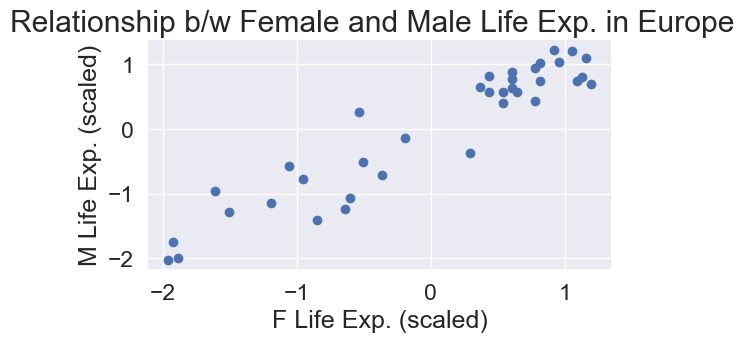

In [52]:
plt.scatter(df_EUpop_num_scaled['female_life_expectancy_scaled'], df_EUpop_num_scaled['male_life_expectancy_scaled'])
plt.xlabel('F Life Exp. (scaled)')
plt.ylabel('M Life Exp. (scaled)')
plt.suptitle('Relationship b/w Female and Male Life Exp. in Europe')
plt.gcf().set_size_inches(6, 3)

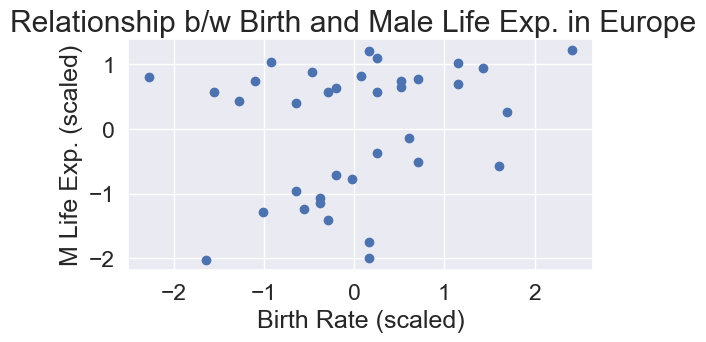

In [53]:
plt.scatter(df_EUpop_num_scaled['birth_rate_scaled'], df_EUpop_num_scaled['male_life_expectancy_scaled'])
plt.xlabel('Birth Rate (scaled)')
plt.ylabel('M Life Exp. (scaled)')
plt.suptitle('Relationship b/w Birth and Male Life Exp. in Europe')
plt.gcf().set_size_inches(6, 3)

Probably the first, right?

### Theoretical Notation for the Behaviour of Residuals

$$\varepsilon \overset{\mathrm{iid}}{\sim} N(\mu = 0, \sigma)$$

- the $\mathrm{iid}$ covers the no autocorrelation assumption
- the $N$ covers the normality assumption (not required, but convenient)
- the $\sigma$ represents the variance of the residuals, which is constant 

This is motivated by defining the line of best fit in a more data science-y way (rather than a linear algebra way). Because we will almost always be using data collected by a sample, we usually say that the observed line:

$$\hat{y} = X\vec{b}$$

with errors $\vec{e} = \vec{y} - \hat{y}$ is the estimate of the true line that would pass through all points in the population:

$$\vec{y} = X\vec{\beta} + \vec{\varepsilon}$$

Note that thus $\vec{b}$ is the vector of coefficients that estimates the true coefficients $\vec{\beta}$, which are unobserved.

Since we assume that $\varepsilon \overset{\mathrm{iid}}{\sim} N(\mu = 0, \sigma)$, then this implies that:

$$\vec{y} \overset{\mathrm{iid}}{\sim} N(\mu = X\beta, \sigma)$$

In other words, each observation of $Y$ is a Normal random variable with mean defined by their $X$ value(s) and same standard deviation.

### How to check assumptions easily

With plots! Specifically **residual plots**. Any plot that uses the residuals is technically called a residual plot, but there are three* specific ones we can use to help us in assessing the assumptions:

- $x$ feature(s) vs. $e$ plots
  - Can help us assess both linearity and homoscedasticity
  - If there is anything besides a random line of points across zero, one of those assumptions is violated
- ordered $e$ plot
  - One of the ways to assess no autocorrelation; again, any patterns suggest the assumption is violated
- histogram of $e$ (or, if you're feeling fancy, a QQ-plot)
  - either of these can help you check that your residuals are generally symmetric about zero (i.e. roughly normal).

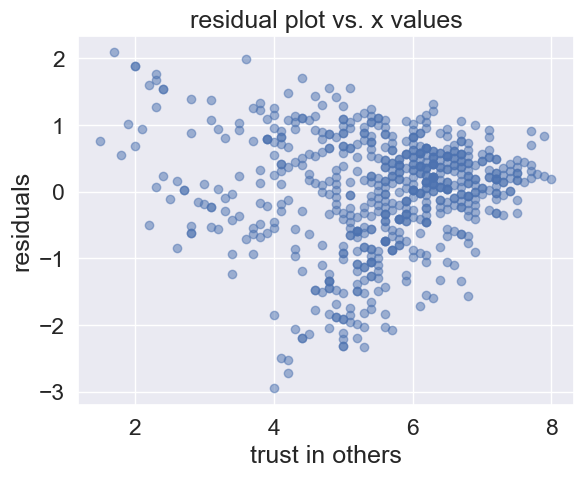

In [54]:
# for predicting Life Sat with Trust In Others
# x values versus residuals
plt.scatter(x, res, alpha=0.5)
plt.xlabel("trust in others")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

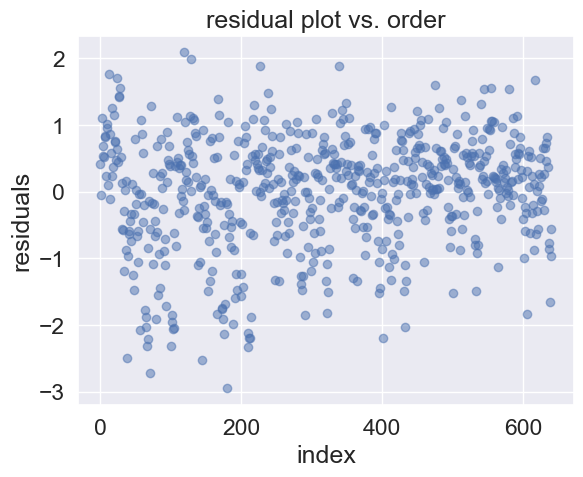

In [55]:
# residuals versus order
plt.scatter(range(len(x)), res, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

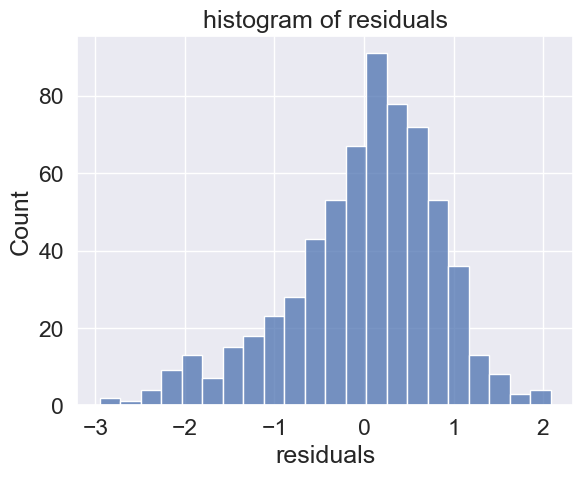

In [56]:
# histogram of residuals
sns.histplot(res, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

In fact, in this case our simple linear model is clearly inadequat, since essentially every assumption except linearity seems to be violated!

- There is less variability in residuals for larger values of Trust in Others (violates Constant Variance)
- There is a clear pattern to the ordered residual plot; we actually know why here, the observations are not independent, there are multiple observations on each country over time (violates No Autocorrelation)
- We also note that the residuals are left skewed and not really centered about zero...

## What to do? Clearly there is *some* relationship, how can we capture it correctly?

- Try including more information (multiple regression). For example, what if we include country (after making it a dummy):

In [57]:
df_EUlife.head()

,Country,LifeSat,TrustInOthers,Sex,AgeClass,EducationClass
0,Belgium,7.8,6.0,Male,Youth,Primary
1,Bulgaria,7.0,5.1,Male,Youth,Primary
2,Czechia,8.3,5.5,Male,Youth,Primary
3,Denmark,7.7,5.0,Male,Youth,Primary
4,Germany,7.7,5.4,Male,Youth,Primary


In [58]:
px.scatter(df_EUlife, x = 'TrustInOthers', y = 'LifeSat', color = 'Country')

In [59]:
country_dummies = pd.get_dummies(df_EUlife, columns=['Country'], drop_first = True)
countryX = np.array(country_dummies.iloc[:,5:]).astype('int')
countryX

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [60]:
X_new = np.concatenate([X, countryX], axis=1)
X_new

array([[1. , 6. , 0. , ..., 0. , 0. , 0. ],
       [1. , 5.1, 0. , ..., 0. , 0. , 0. ],
       [1. , 5.5, 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 5.4, 0. , ..., 0. , 0. , 0. ],
       [1. , 5.4, 0. , ..., 0. , 0. , 0. ],
       [1. , 3.2, 0. , ..., 0. , 1. , 0. ]])

In [61]:
X_new.shape

(641, 38)

In [62]:
# new line of best fit
b_new = np.matmul(np.linalg.inv(np.matmul(X_new.T, X_new)), np.matmul(X_new.T, y))
b_new

array([1.82707252, 0.71845754, 1.90921626, 1.44190064, 0.26510958,
       0.77292981, 3.80866309, 2.09150419, 2.23947169, 1.14352301,
       1.03132795, 1.28267813, 1.56155682, 2.10249807, 1.03951838,
       2.34113211, 1.26011427, 0.91940594, 0.63232346, 0.31994386,
       1.8995491 , 1.48666956, 2.82428557, 0.39103746, 1.08304834,
       0.44988976, 2.14071924, 1.34685924, 1.52885519, 0.69652851,
       0.55879405, 0.96444734, 2.49587756, 0.81276671, 2.38452246,
       1.4804068 , 2.10396446, 1.44395148])

In [63]:
# get the residuals
res2 = y - np.matmul(X_new, b_new)

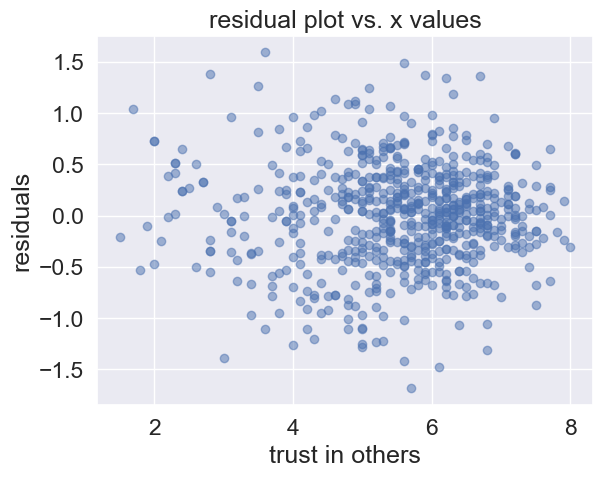

In [64]:
# for predicting Life Sat with Trust In Others
# x values versus residuals
plt.scatter(x, res2, alpha=0.5)
plt.xlabel("trust in others")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

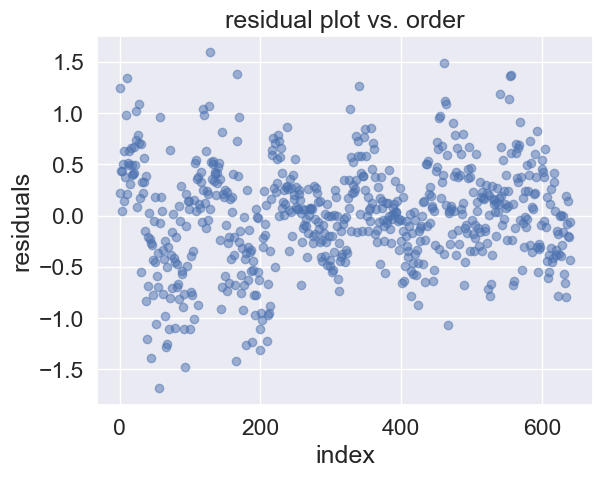

In [65]:
# residuals versus order
plt.scatter(range(len(x)), res2, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

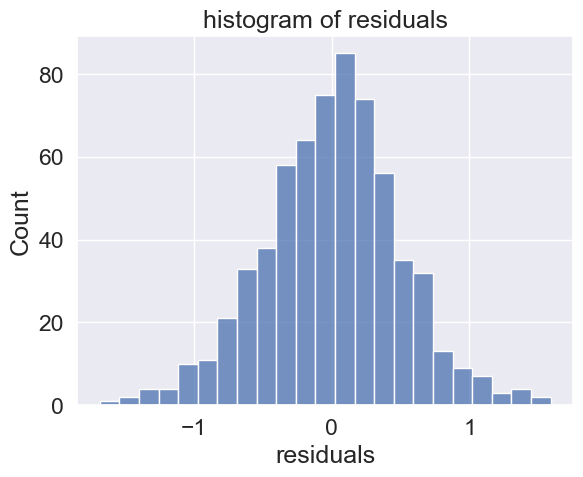

In [66]:
# histogram of residuals
sns.histplot(res2, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

Seems to have fixed the non constant variance issue! Still an autocorrelation issue (this is, however, likely due to **time** not being accounted for, but accounting for it is a bit beyond the scope of this class). 

However, even if everything else did look good, now we have to worry about checking **multicollinearity**, i.e. if the different $x$-features are related. If they are (i.e. if the vectors are dependent), the model will not be trustworthy. This is a bit tricky to check; you can't just check pairwise correlations between the features, because more that two $x$-features might be multicollinear. The best check is to see if changing the order of the $x$-features makes a difference.

In theory (i.e. when there isn't multicollinearity) it shouldn't:

In [67]:
# remind ourselves what b was;
b_new

array([1.82707252, 0.71845754, 1.90921626, 1.44190064, 0.26510958,
       0.77292981, 3.80866309, 2.09150419, 2.23947169, 1.14352301,
       1.03132795, 1.28267813, 1.56155682, 2.10249807, 1.03951838,
       2.34113211, 1.26011427, 0.91940594, 0.63232346, 0.31994386,
       1.8995491 , 1.48666956, 2.82428557, 0.39103746, 1.08304834,
       0.44988976, 2.14071924, 1.34685924, 1.52885519, 0.69652851,
       0.55879405, 0.96444734, 2.49587756, 0.81276671, 2.38452246,
       1.4804068 , 2.10396446, 1.44395148])

In [68]:
# fit in different order; swap Austria and Belgium
# define function to swap columns
def swap_columns(df, col1, col2):
    """ swaps two columns of a data frame

    Args:
        df: the data frame
        col1: first column to swap
        col2: second column to swap

    Returns:
        df: the new data frame
    """
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

swap_dummies = swap_columns(country_dummies, 'Country_Austria', 'Country_Belgium')
# remake X matrix
countryX = np.array(swap_dummies.iloc[:,5:]).astype('int')
X_new = np.concatenate([X, countryX], axis=1)
# redo regression
b_new = np.matmul(np.linalg.inv(np.matmul(X_new.T, X_new)), np.matmul(X_new.T, y))
# check 3rd and 4th coefficients
b_new

array([1.82707252, 0.71845754, 1.44190064, 1.90921626, 0.26510958,
       0.77292981, 3.80866309, 2.09150419, 2.23947169, 1.14352301,
       1.03132795, 1.28267813, 1.56155682, 2.10249807, 1.03951838,
       2.34113211, 1.26011427, 0.91940594, 0.63232346, 0.31994386,
       1.8995491 , 1.48666956, 2.82428557, 0.39103746, 1.08304834,
       0.44988976, 2.14071924, 1.34685924, 1.52885519, 0.69652851,
       0.55879405, 0.96444734, 2.49587756, 0.81276671, 2.38452246,
       1.4804068 , 2.10396446, 1.44395148])

But what happens when we include **ALL** the data to try to predict Life Satisfaction:

In [69]:
all_dummies = pd.get_dummies(df_EUlife, columns=['Country', 'Sex', 'AgeClass', 'EducationClass'])
bigX = np.array(all_dummies.iloc[:,5:]).astype('int')
# above gets the dummy variables for all categorical features

In [70]:
X_all = np.concatenate([X, bigX], axis=1)
X_all

array([[1. , 6. , 0. , ..., 1. , 0. , 0. ],
       [1. , 5.1, 1. , ..., 1. , 0. , 0. ],
       [1. , 5.5, 0. , ..., 1. , 0. , 0. ],
       ...,
       [1. , 5.4, 0. , ..., 0. , 0. , 1. ],
       [1. , 5.4, 0. , ..., 0. , 0. , 1. ],
       [1. , 3.2, 0. , ..., 0. , 0. , 1. ]])

In [71]:
X_all.shape

(641, 44)

In [72]:
# new line of best fit
b_all = np.matmul(np.linalg.inv(np.matmul(X_all.T, X_all)), np.matmul(X_all.T, y))
b_all

# that's a lot of slopes!

array([-5.24797898e+14, -1.43771036e+01, -1.51305136e+01,  5.62349955e-01,
       -4.78392795e+01, -1.14292199e+01, -4.02928972e+00,  6.56617007e-01,
        2.64786644e+01,  5.45450235e+00,  1.34113548e+00, -2.71444695e+01,
       -7.08043349e+00, -8.31067289e-01,  2.01445143e+01,  1.02542470e+01,
       -8.04074442e+00,  1.17477007e+01, -2.21754453e+01,  5.51658474e+00,
       -2.18419452e+01,  5.53402350e+00,  1.61078756e+01, -1.86995297e+00,
        4.92941022e-01,  1.09643728e+01, -3.87519380e+00,  1.88109079e+01,
       -9.38854129e+00,  4.28929713e+00, -1.93181658e+01,  1.67427432e+01,
       -6.85625607e+00,  1.40167217e+01, -3.47636162e+01,  4.98082132e+00,
       -3.16876619e+15, -3.16876619e+15,  3.69356408e+15,  3.69356408e+15,
        3.69356408e+15, -8.00000000e+00, -2.00000000e+00, -4.00000000e+00])

In [73]:
# get the residuals
res3 = y - np.matmul(X_all, b_all)

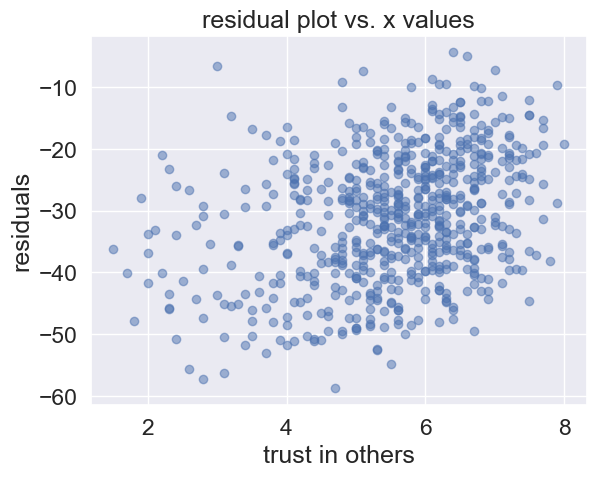

In [74]:
# for predicting Life Sat with Trust In Others
# x values versus residuals
plt.scatter(x, res3, alpha=0.5)
plt.xlabel("trust in others")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

Immediately, something is wrong... Why are all our residuals negative? Aren't they supposed to have a mean of zero? Isn't that *guranteed* when fitting a line of best fit?? What if we switch the last two columns?

In [75]:
all_dummies.columns

Index(['LifeSat', 'TrustInOthers', 'Country_Albania', 'Country_Austria',
       'Country_Belgium', 'Country_Bulgaria', 'Country_Croatia',
       'Country_Cyprus', 'Country_Czechia', 'Country_Denmark',
       'Country_Estonia', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hungary',
       'Country_Iceland', 'Country_Ireland', 'Country_Italy', 'Country_Kosovo',
       'Country_Latvia', 'Country_Lithuania', 'Country_Luxembourg',
       'Country_Malta', 'Country_Montenegro', 'Country_Netherlands',
       'Country_North Macedonia', 'Country_Norway', 'Country_Poland',
       'Country_Portugal', 'Country_Romania', 'Country_Serbia',
       'Country_Slovakia', 'Country_Slovenia', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_Turkiye',
       'Country_United Kingdom', 'Sex_Female', 'Sex_Male', 'AgeClass_Adult',
       'AgeClass_Senior', 'AgeClass_Youth', 'EducationClass_Primary',
       'EducationClass_Secondary', 'Educatio

In [76]:
# remind ourselves what the coefficients were
b_all

array([-5.24797898e+14, -1.43771036e+01, -1.51305136e+01,  5.62349955e-01,
       -4.78392795e+01, -1.14292199e+01, -4.02928972e+00,  6.56617007e-01,
        2.64786644e+01,  5.45450235e+00,  1.34113548e+00, -2.71444695e+01,
       -7.08043349e+00, -8.31067289e-01,  2.01445143e+01,  1.02542470e+01,
       -8.04074442e+00,  1.17477007e+01, -2.21754453e+01,  5.51658474e+00,
       -2.18419452e+01,  5.53402350e+00,  1.61078756e+01, -1.86995297e+00,
        4.92941022e-01,  1.09643728e+01, -3.87519380e+00,  1.88109079e+01,
       -9.38854129e+00,  4.28929713e+00, -1.93181658e+01,  1.67427432e+01,
       -6.85625607e+00,  1.40167217e+01, -3.47636162e+01,  4.98082132e+00,
       -3.16876619e+15, -3.16876619e+15,  3.69356408e+15,  3.69356408e+15,
        3.69356408e+15, -8.00000000e+00, -2.00000000e+00, -4.00000000e+00])

In [77]:
swap_dummies2 = swap_columns(all_dummies, 'EducationClass_Secondary', 'EducationClass_Tertiary')
# remake X matrix
fullX_swap = np.array(swap_dummies2.iloc[:,5:]).astype('int')
X_all = np.concatenate([X, fullX_swap], axis=1)
# redo regression
b_all = np.matmul(np.linalg.inv(np.matmul(X_all.T, X_all)), np.matmul(X_all.T, y))
# check the coefficients
b_all

array([-7.46359853e+15,  2.10009206e+01,  1.25136806e+01, -7.28892404e+00,
        6.57520823e+01,  1.23014936e+01,  2.89173883e+00, -6.77468129e+00,
       -3.96319912e+01, -1.27721188e+01, -5.46824763e+00,  3.39110168e+01,
        3.24702230e+00, -2.65902163e+00, -3.37100346e+01, -1.99252938e+01,
        2.34323132e+00, -2.68874904e+01,  2.72067021e+01, -1.22681855e+01,
        2.61354867e+01, -1.48097722e+01, -2.91204397e+01, -1.02940836e+01,
       -5.26107170e+00, -2.27776198e+01,  2.77426652e+00, -2.62635662e+01,
        8.87648408e+00, -1.07649330e+01,  1.94378969e+01, -3.23679170e+01,
        5.75212050e+00, -2.18354002e+01,  6.13303133e+01, -2.54064248e+01,
        2.13011311e+16,  2.13011311e+16, -1.38375325e+16, -1.38375325e+16,
       -1.38375325e+16,  8.00000000e+00,  6.00000000e+00,  0.00000000e+00])

## Dangers of Multicollinearity/Overfitting

Notice we used the exact same data, but the model is not **unidentifiable**; this happens when you have more features than data points; at that point, multicollinearity becomes guaranteed (because, if you recall from the linear algebra part, $N$ vectors of length $< N$ are guaranteed to be dependent). **Do not fit a model with more features than observations!** (there are some ways to address this, but they are again beyond the scope of the class). Multicollinearity **also occurs** when the $x$ features (even if there aren't too many of them) are **highly correlated to each other**. This once means that the model will not be reliable, because it is difficult to know if the correlated $x$ features actually each impact $y$, or if one of them impacts $y$ and the other only seems like it does because it is correlated with the $x$ that does. (Think about confounding variables).

While not exactly related, we have also **overfit** our data; overfitting happens when you include **too many** features or higher order terms in your data. This can happen even if you *don't* have multicollinearity, and means that your results are no longer **generalizable**. One way to check to see if you are overfitting is to perform **cross validation**, but before we talk about that, we should talk about:

## Comparing models

Since we could have multiple models for the same relationship, we should discuss two measures that are most common for evaluating how good a model is (and one which will come back real soon when we talk about gradient descent and baby neural networks).

- Mean squared error, $MSE$
- Coefficient of determination, $R^2$

### Mean Square Error, $MSE$

- MSE measures how closely a line (i.e. $b_1, b_0$) comes to all observations $(x, y)$
- MSE is 0 when the line goes through all points exactly
- MSE is large when the line is far from many pairs $(x, y)$

**The best fit line $(b_1, b_0)$ is the one which minimizes MSE**

$$
    MSE = \frac{1}{n}\sum_{j} {(y_j - \hat{y}_j)^2} = \frac{1}{n} \sum_{j} e_{j}^2
$$

In [78]:
# what is the MSE for the simple Trust vs. LifeSat model?
MSE_1 = (res**2).mean()
MSE_1

0.7097026136779861

In [79]:
# what about the more complex model with all the countries included?
MSE_2 = (res2**2).mean()
MSE_2

0.25101876242156934

A smaller MSE means a better model; even though the second model is still not perfect (because of the autocorrelation) it is *better* than the first, on average!

### $R^2$ is the percentage of variance of y can be explained by the model

$$R^2 = 1-\frac{MSE}{\sigma_y^2}$$

$R^2$ is the percent of variance of $y$ explained by $X$ (under model; also called the **coefficient of determination**)

Intuition:
- $R^2 = 0$
    - $X$, using this model, doesn't explain any of the variance of $y$
- $R^2 = .5$
    - $X$, using this model, explains half the variance of $y$
- $R^2 = 1$
    - $X$, using this model, explains all the differences in $y$

In [80]:
# comparing the R2
r2_1 = 1 - (MSE_1/y.var())
print(r2_1)
r2_2 = 1 - (MSE_2/y.var())
print(r2_2)

0.21876258113986646
0.7236796846169276


Including countries also drastically improved the $R^2$! We've definitely started on our path to understanding Life Satisfaction! However, be a bit careful with these measures (for a couple reasons). Let's think about $R^2$ for a second, by first examining the first model. Notice the relationship between $R^2$ and the correlation between $y$ and $yhat$ in a simple linear model:

In [81]:
# hmmm, if it's R^2, what's R?
print(np.sqrt(r2_1))
# Correlation between y and y
np.corrcoef(y, np.matmul(X, b))

0.4677206229576225


array([[1.        , 0.46772062],
       [0.46772062, 1.        ]])

In simple linear regression, $R^2$ is simply the correlation between $y$ and $\hat{y}$, squared!

## BUT WAIT

Remember that correlation requires a **linear** relationship to be meaningful; if there is some curving/non-linear trend to the relationship between the observed and predicted response, you cannot use $R^2$ meaningfully, because it is directly related to correlation. **FURTHER**, $R^2$ will **ALWAYS** get better (bigger) the **MORE** $x$-features you use to predict $y$ with, *even if you include unnecessary, nonsense or misleading $x$-features*. In other words, if you overfit, the $R^2$ of the full model won't be able to tell you (in fact, it will just tell you that the model is even better than before).

## Enter: Cross Validation

Cross validation is an important tool for assessing model performance in **ALL** supervised machine learning methods. Let's explore it (and also introduce `sklearn`'s `LinearRegression` function).

### Types of Cross Validation

There are several different strategies for determining how well your model will perform on new data, but they all generally follow this framework:

- Break up your data into two subsets (call them the *training* and *test* sets)
- Fit your candidate model(s) on the *training* set
- Evaluate how that model does in predicting the *test* set

In other words, you pretend that some of your data is "new", and that you don't immediately know the response feature. This allows you to figure out in a more systematic (trustworthy) way how the model performs.

### How to break up your data

There are several different strategies. The two most common (and sort of on opposite extremes):

- Single-fold Cross Validation
  - Make a 60-40, or 70-30, or 80-20 split of your data into training-test sets. Run the model once on the training set, predict the test set once.
- Leave-one-out Cross Validation (LOO-CV)
  - Loop through the data and leave out a single observation to test, including all the other observations in the training set. I.e. if you have $n$ observations, you are running the model $n$ times, once for each observation that you leave out and then predict.
 
Even though LOO-CV is probably the best way to approach Cross Validation in general, Single-fold Cross Validation is most often used when you have **a lot** of data, and so running the model once for each observation is going to be time consuming (and, if you have enough data, you won't lose too much in terms of insight). With smaller data sets (say, less than a few hundred), LOO-CV shouldn't take too long and can make your insight to the model's performance much more trustworthy. There are also strategies in-between these two ($k$-fold Cross Validation, where you break up your data into $k$ sets, looping through each as a test set while treating the rest as the training set; LOO-CV is a special case of this when $k=n$).

How does it work:

In [82]:
# Single-fold cross validation
crossval = train_test_split(X_new, 
                            y,
                            test_size=0.3,
                            random_state=3)

Xtrain, Xtest, ytrain, ytest = crossval

In [83]:
Xtrain.shape, ytrain.shape

((448, 38), (448,))

In [84]:
Xtest.shape, ytest.shape

((193, 38), (193,))

In [85]:
from sklearn.linear_model import LinearRegression

# Single-fold cross validation
crossval = train_test_split(X_new, 
                            y,
                            test_size=0.3)

Xtrain, Xtest, ytrain, ytest = crossval

# first demonstrate the usage by fitting the full model
# set up both models using scikit-learn
modelA = LinearRegression()
modelB = LinearRegression()

# note that scikit-learn does not require (in fact, does not accept) the bias column
# (it makes it's own; you'll also write a function that does this on the homework)
modelA.fit(Xtrain[:,1].reshape(-1, 1), ytrain)
modelB.fit(Xtrain[:,1:].reshape(-1, 37), ytrain)

predA = modelA.predict(Xtest[:,1].reshape(-1,1))
predB = modelB.predict(Xtest[:,1:].reshape(-1,37))

resA = ytest - predA
resB = ytest - predB

MSE_A = (resA**2).mean()
MSE_B = (resB**2).mean()

r2_A = 1 - (MSE_A)/(ytest.var())
r2_B = 1 - (MSE_B)/(ytest.var())

print(r2_A)
print(r2_B)

0.15293295881537294
0.5925652752582806


## Implement LOO-CV

To properly compare models, we should find $R^2$ and compare on **cross validated** data.

In [86]:
# set up the array of predictions to fill out
y_predsA = np.empty(len(y))

# loop through each observation
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X_new[:obs, 1].reshape(-1,1), X_new[obs+1:, 1].reshape(-1,1)))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_regress = LinearRegression()
    loocv_regress.fit(loocv_trainX, loocv_trainy)
    # and predict the held out observation (and store it)
    y_predsA[obs] = loocv_regress.predict(X_new[obs,1].reshape(-1,1))[0]

# using sklearn to calculate R2
from sklearn.metrics import r2_score
print(r2_score(y, y_predsA)) #notice this is just *slightly* smaller than the full model R2
# and get the MSE
print(((y - y_predsA)**2).mean())

0.2135708200404215
0.7144189858497695


In [87]:
# now for Model B
y_predsB = np.empty(len(y))

# loop through each observation
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X_new[:obs, 1:].reshape(-1,37), X_new[obs+1:, 1:].reshape(-1,37)))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_regress = LinearRegression()
    loocv_regress.fit(loocv_trainX, loocv_trainy)
    # and predict the held out observation (and store it)
    y_predsB[obs] = loocv_regress.predict(X_new[obs,1:].reshape(-1,37))[0]

print(r2_score(y, y_predsB)) #not all that smaller, but... more smaller? seems we're at least not overfitting too much!
print(((y - y_predsB)**2).mean()) #still better than the simple model!

0.6864727204741721
0.284818832748032


## Regression Wrap Up

While we didn't see any examples of polynomial regression (due to time constraints), you can simply add higher order terms of $x$ features to the $X$ matrix to account for non-linear trends in the data. For example, to fit a quadratic curve:

$$
y = b_0 + b_1x + b_2x^2
$$

Where: $X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \end{bmatrix}$

And you could add more, or other $x$ features as you wish (just keep in mind the issues with overfitting we **JUST** discussed!!).

In general, approaching a regression problem should take the form:

1. Determine which $x$ feature(s) you will use to predict your $y$ feature
   - Create your $X$ design matrix with bias column and columns for each of the $x$ feature(s)
2. Find the line of best fit coefficients and interpret: $(X^TX)^{-1}X^Ty$
3. Check the assumptions
   - If linearity is violated, determine if a polynomial relationship for one (or more) of the features makes sense
   - If constant variance is violated, determine if adding more feature(s) may help (but not too many), or if a transformation may help
   - If no autocorrelation is violated, determine if adding more feature(s) may help (but not too many), or cry (because we haven't talked about time series models)
   - Don't add too many features, or you'll definitely have multicollinearity
   - If all the assumptions look good (or at least reasonable/not too bad) keep as a candidate model
4. Whether you have only one or multiple candidate models, perform cross validation to assess the performance of the model(s) and choose the one that seems to do the best, discussing the implications of the coefficients and using it for predictions.

**FINALLY** (and this is true for all ML), remember that your model is not perfect; it could always be improved in some way! Especially think critically about what biases or confounding features may not be accounted for.